__Dataset__ : 
- Customer's purchasing intention based on click data. 
- Data collected through Google Analytics. 

__Project Goals__:
1. Try the effect of oversampling methods like SMOTE to solve the issue of imbalanced dataset. 
2. Experimenting with decision trees by fine tuning it's hyper parameters.

__Methods Used__: 
1. SMOTE (Synthetic Minority Oversampling Technique) for imbalanced dataset
2. Decision Trees for Classification

__Steps__:
- Load data
- Pre-processing & Encoding
- Decision trees
- SMOTE
- Experimenting with depth and criteria


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data_master = pd.read_csv(r'')

In [3]:
data_master.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Variable summary

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" : Represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


In [4]:
data_master['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [5]:
data_master.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

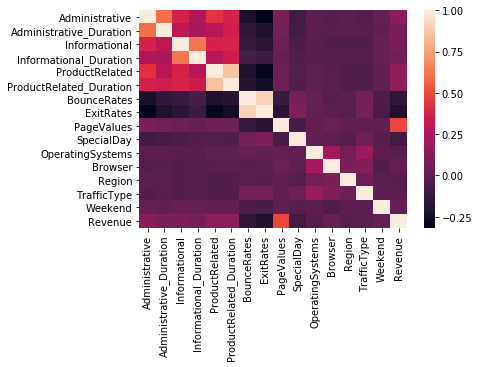

In [6]:
sns.heatmap(data_master.corr())

Checking for correlated variables

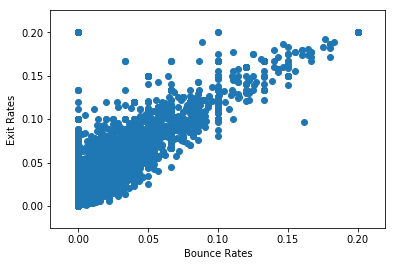

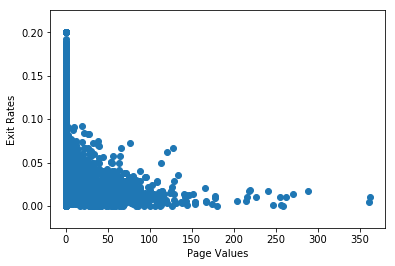

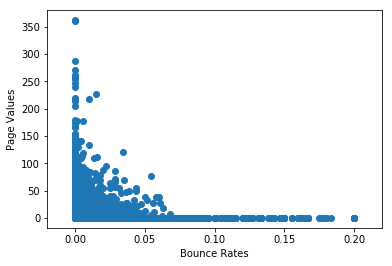

In [7]:
plt.scatter(data_master['BounceRates'],data_master['ExitRates'])
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.show()

plt.scatter(data_master['PageValues'],data_master['ExitRates'])
plt.xlabel('Page Values')
plt.ylabel('Exit Rates')
plt.show()

plt.scatter(data_master['BounceRates'],data_master['PageValues'])
plt.xlabel('Bounce Rates')
plt.ylabel('Page Values')
plt.show()

# Data pre-processing

Drop Variables:
- Exit Values: Since it is correlated with two variables
    

In [8]:
data_1 = data_master.drop(columns='ExitRates').copy()

In [9]:
data_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(2), float64(6), int64(7), object(2)
memory usage: 

# Encoding

- Weekend, Visitor Type and Revenue to binary
- Month to Label

In [11]:
data_master_1 = data_master.copy()
data_master_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
data_master.iloc[:,-3:].head()

,VisitorType,Weekend,Revenue
0,Returning_Visitor,False,False
1,Returning_Visitor,False,False
2,Returning_Visitor,False,False
3,Returning_Visitor,False,False
4,Returning_Visitor,True,False


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
for i in data_master_1.columns[-3:]:
    data_master_1[i]=LabelBinarizer().fit_transform(data_master_1[i])

In [15]:
data_master_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,0,1,0


In [16]:
data_master_1 = pd.get_dummies(data_master_1,prefix='month_',columns=['Month'],drop_first=True)

In [17]:
data_master_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,month__Dec,month__Feb,month__Jul,month__June,month__Mar,month__May,month__Nov,month__Oct,month__Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


# Decision Trees
<br>Don't know how Decision trees works? Refer to my article [here](https://nbviewer.jupyter.org/github/rushi-sheth/Blogs/blob/master/Objective%20functions%20.ipynb) on how machine learning algorithms work.

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [19]:
data_features = data_master_1.drop(columns=['Revenue']).copy()
data_target = data_master_1['Revenue'].copy()

In [20]:
data_target.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data_features,data_target,test_size=0.35)

In [22]:
classifier = tree.DecisionTreeClassifier(criterion='gini')
classifier_model = classifier.fit(x_train,y_train)

In [23]:
prediction_tree = classifier_model.predict(x_test)

In [24]:
print (metrics.classification_report(y_test,prediction_tree))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3659
           1       0.54      0.57      0.55       657

    accuracy                           0.86      4316
   macro avg       0.73      0.74      0.73      4316
weighted avg       0.86      0.86      0.86      4316



In [25]:
fpr,tpr,_ =  metrics.roc_curve(y_test,prediction_tree)
roc_auc = metrics.auc(fpr, tpr)

### Observations:

1. The precision of label 0,i.e., no revenue generated is 92% and recall is 91%. This means that the algorithm is able to perform good prediction for non revenue generating customers.

2. The precision of label 1,i.e., revenue generating customer is only 54% and recall is 57%. This is on a much lower side compared to label 0. I believe this is because of imbalanced dataset. 

I further experiment by balancing the dataset.

# Imbalanced data solutions:

Either we can use different metrics or try sampling methods:

1- Sampling (undersampling) --> Better- sampling + ensemble

2- Sampling (oversampling)-->SMOTE,ADASYN etc. ( we will be testing SMOTE in this example)

In [26]:
from imblearn.over_sampling import SMOTE

C:\Users\Rushi Sheth\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1251
Before OverSampling, counts of label '0': 6763 

After OverSampling, the shape of train_X: (13526, 25)
After OverSampling, the shape of train_y: (13526,) 

After OverSampling, counts of label '1': 6763
After OverSampling, counts of label '0': 6763


In [30]:
classifier_n = tree.DecisionTreeClassifier(criterion='gini')
classifier_n = classifier_n.fit(x_train_res,y_train_res)

In [31]:
samp = classifier_n.predict(x_test)

In [32]:
print (metrics.classification_report(y_test,samp))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3659
           1       0.54      0.60      0.57       657

    accuracy                           0.86      4316
   macro avg       0.73      0.75      0.74      4316
weighted avg       0.87      0.86      0.86      4316



In [33]:
fpr_s,tpr_s,_s =  metrics.roc_curve(y_test,samp)
roc_auc_s = metrics.auc(fpr_s, tpr_s)

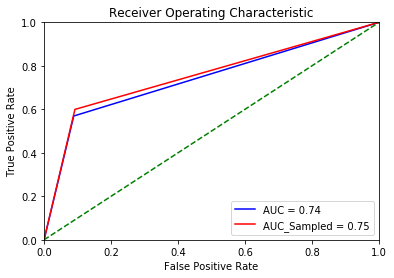

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_s, tpr_s, 'r', label = 'AUC_Sampled = %0.2f' % roc_auc_s)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We observe there are no major difference in this task. 

# Experimenting tree depth and criteria on balanced dataset.

In [35]:
classifier_n_depth = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier_n_depth = classifier_n.fit(x_train_res,y_train_res)
samp_depth = classifier_n_depth.predict(x_test)

In [36]:
print (metrics.classification_report(y_test,samp_depth))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3659
           1       0.55      0.60      0.57       657

    accuracy                           0.86      4316
   macro avg       0.74      0.75      0.74      4316
weighted avg       0.87      0.86      0.87      4316



In [37]:
fpr_s_d,tpr_s_d,_s_d =  metrics.roc_curve(y_test,samp)
roc_auc_s_d = metrics.auc(fpr_s_d, tpr_s_d)

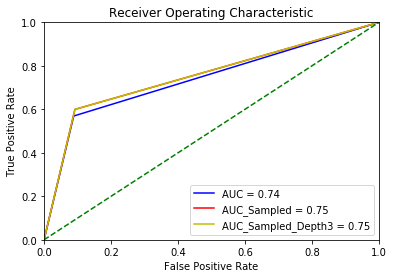

In [38]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_s, tpr_s, 'r', label = 'AUC_Sampled = %0.2f' % roc_auc_s)
plt.plot(fpr_s, tpr_s, 'y', label = 'AUC_Sampled_Depth3 = %0.2f' % roc_auc_s_d)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observations:

1. After balancing the dataset, we are able to increase the recall of label 1.0 to 60%. A very minor increase as compared to the original dataset.
2. Same results are obtained after changing the depth and node criteria.